# Case Study: RETAIL FORECASTING

### Time Series Analysis

#### Problem Statement:
The objective of the catalog prediction exercise is to build a forecast for the number of items that will be consumed by men in
the next four months.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [14]:
data=pd.read_csv('Downloads/retail.csv', index_col=0)
data.shape

(120, 15)

In [7]:
data.columns

Index(['date', 'men', 'women', 'jewel', 'mail', 'page', 'phone', 'print',
       'service', 'YEAR_', 'MONTH_', 'DATE_', 'Seasonal_Err_Men',
       'Seasonal_AdjSer_Men', 'Seasonal_Factors_Men',
       'Seasonal_TrendCycle_Men'],
      dtype='object')

In [4]:
data.nunique(axis=0)

date                       120
men                        120
women                      120
jewel                      120
mail                       117
page                        48
phone                       36
print                      120
service                     43
YEAR_                       10
MONTH_                      12
DATE_                      120
Seasonal_Err_Men           120
Seasonal_AdjSer_Men        120
Seasonal_Factors_Men        12
Seasonal_TrendCycle_Men    120
dtype: int64

In [8]:
data.head()

,men,women,jewel,mail,page,phone,print,service,YEAR_,MONTH_,DATE_,Seasonal_Err_Men,Seasonal_AdjSer_Men,Seasonal_Factors_Men,Seasonal_TrendCycle_Men
date,,,,,,,,,,,,,,,
01-01-1989,11357.92,16578.93,10776.38,7978,73,34,22294.48,20,1989,1,Jan-89,0.919551,11932.954700,0.951811,12976.92973
01-02-1989,10605.95,18236.13,10821.97,8290,88,29,27426.47,20,1989,2,Feb-89,0.846981,12550.902570,0.845035,14818.39279
01-03-1989,16998.57,43393.55,22845.79,8029,65,24,27978.66,26,1989,3,Mar-89,1.496159,19971.321100,0.851149,13348.39061
01-04-1989,6563.75,30908.49,11102.62,7752,85,20,28949.65,22,1989,4,Apr-89,0.678450,7727.042000,0.849452,11389.26250
01-05-1989,6607.69,28701.58,16066.57,8685,74,17,22642.27,21,1989,5,May-89,0.753748,7732.708346,0.854512,10259.00632


In [10]:
data_c=data.drop(['women','jewel','mail','phone','page','print','service','YEAR_','MONTH_','DATE_','Seasonal_Err_Men'], axis=1)

In [11]:
data_c.head()

,men,Seasonal_AdjSer_Men,Seasonal_Factors_Men,Seasonal_TrendCycle_Men
date,,,,
01-01-1989,11357.92,11932.954700,0.951811,12976.92973
01-02-1989,10605.95,12550.902570,0.845035,14818.39279
01-03-1989,16998.57,19971.321100,0.851149,13348.39061
01-04-1989,6563.75,7727.042000,0.849452,11389.26250
01-05-1989,6607.69,7732.708346,0.854512,10259.00632


In [9]:
data_c.describe()

,men,Seasonal_AdjSer_Men,Seasonal_Factors_Men,Seasonal_TrendCycle_Men
count,120.000000,120.000000,120.000000,120.000000
mean,16242.813417,16235.456180,1.000000,16233.462807
std,6324.987806,4796.910924,0.259508,3718.881008
min,3245.180000,3486.579724,0.845035,10019.529190
25%,11750.250000,12740.752310,0.853671,13101.327858
50%,15452.275000,15290.650515,0.898311,15235.227910
75%,19093.970000,20005.304250,0.991128,19416.824878
max,38609.660000,31765.708970,1.794575,26004.757360


In [6]:
data.isnull().sum()

date                       0
men                        0
women                      0
jewel                      0
mail                       0
page                       0
phone                      0
print                      0
service                    0
YEAR_                      0
MONTH_                     0
DATE_                      0
Seasonal_Err_Men           0
Seasonal_AdjSer_Men        0
Seasonal_Factors_Men       0
Seasonal_TrendCycle_Men    0
dtype: int64

In [7]:
data['date'].unique()

array(['01-01-1989', '01-02-1989', '01-03-1989', '01-04-1989',
       '01-05-1989', '01-06-1989', '01-07-1989', '01-08-1989',
       '01-09-1989', '01-10-1989', '01-11-1989', '01-12-1989',
       '01-01-1990', '01-02-1990', '01-03-1990', '01-04-1990',
       '01-05-1990', '01-06-1990', '01-07-1990', '01-08-1990',
       '01-09-1990', '01-10-1990', '01-11-1990', '01-12-1990',
       '01-01-1991', '01-02-1991', '01-03-1991', '01-04-1991',
       '01-05-1991', '01-06-1991', '01-07-1991', '01-08-1991',
       '01-09-1991', '01-10-1991', '01-11-1991', '01-12-1991',
       '01-01-1992', '01-02-1992', '01-03-1992', '01-04-1992',
       '01-05-1992', '01-06-1992', '01-07-1992', '01-08-1992',
       '01-09-1992', '01-10-1992', '01-11-1992', '01-12-1992',
       '01-01-1993', '01-02-1993', '01-03-1993', '01-04-1993',
       '01-05-1993', '01-06-1993', '01-07-1993', '01-08-1993',
       '01-09-1993', '01-10-1993', '01-11-1993', '01-12-1993',
       '01-01-1994', '01-02-1994', '01-03-1994', '01-04

In [17]:
data['men'].unique()

array([11357.92, 10605.95, 16998.57,  6563.75,  6607.69,  9839.  ,
        9398.32, 10395.53, 11663.13, 12805.22, 13636.25, 22849.01,
       12325.8 ,  8273.58, 10061.19, 11497.76, 10363.16, 10194.68,
        8401.24, 13642.89, 12772.63, 14539.47, 14927.35, 19170.12,
       11771.4 , 10278.09, 11857.59,  9516.91, 10074.24, 19504.5 ,
       12519.27,  8567.18,  9671.22, 11556.62, 15507.65, 25896.35,
       11218.73, 17277.72,  8214.14, 11111.67, 13446.88, 11751.36,
       13703.47, 16227.79, 11958.03, 16492.76, 11907.34, 26432.44,
       12340.27, 10750.18, 11469.63, 11746.92, 21228.59, 11683.26,
       12900.04, 14274.13, 15443.74, 16823.61, 15438.89, 27831.92,
       12725.7 , 12583.02, 12640.57, 15439.02, 11314.28, 15956.74,
       14710.61, 17777.68, 26931.2 , 19135.79, 17430.03, 31090.05,
       23967.98, 17439.42, 17882.83, 12688.89, 12694.22,  6766.94,
       13586.38, 12651.74, 16536.12, 22533.51, 19229.11, 28694.6 ,
       17679.  , 16991.33, 16375.99, 22562.4 , 15713.78, 16788

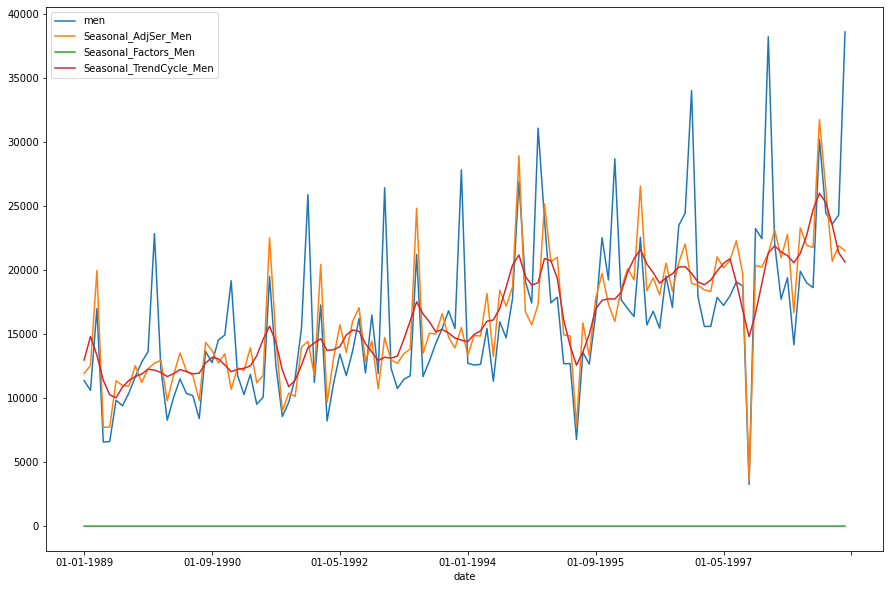

In [12]:
data_c.plot('date', figsize=(15,10))

Text(0.5, 1.0, 'Men v/s Date')

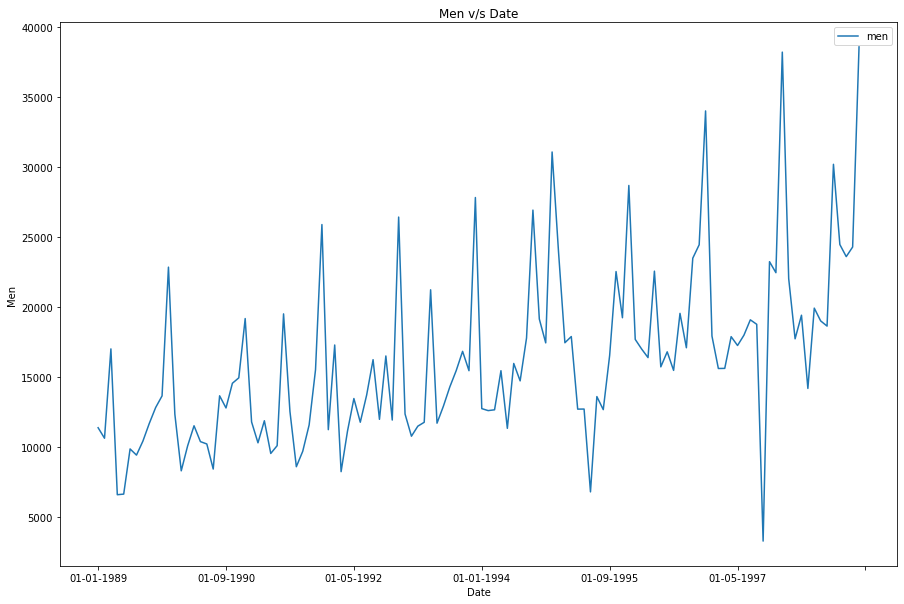

In [72]:
data_c.plot( x='date', y='men',  figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Men')
plt.title('Men v/s Date')

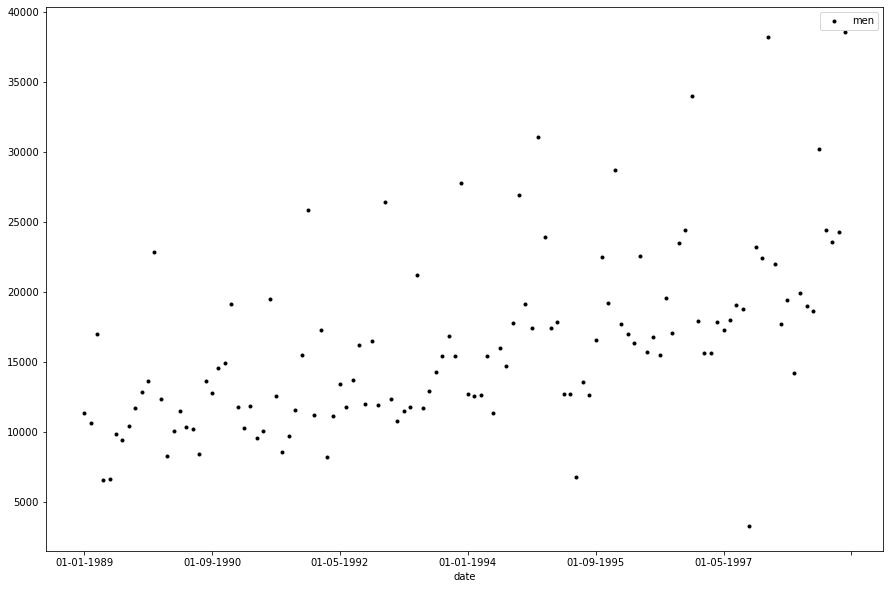

In [14]:
data_c.plot(x='date', y='men', style='k.', figsize=(15,10))

In [15]:
data_c.size

600

In [16]:
data_ma=data_c.rolling(window=10).mean()

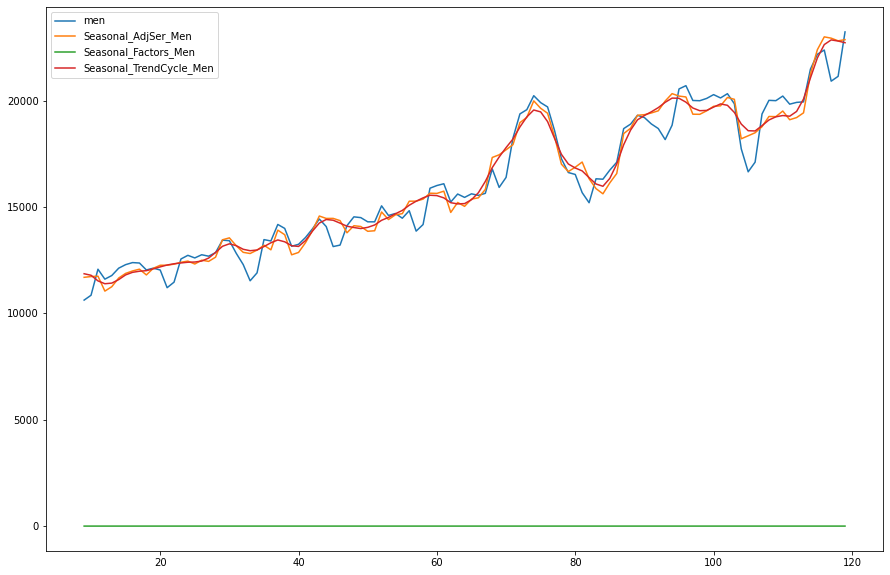

In [26]:
data_ma.plot(figsize=(15,10))

In [22]:
data_men=data_c.drop(['Seasonal_AdjSer_Men','Seasonal_Factors_Men','Seasonal_TrendCycle_Men'],axis=1)

###### Naive Model

In [39]:
data_base=pd.concat([data_men,data_men.shift(1)],axis=1)

In [40]:
data_base.head()

,men,men
date,,
01-01-1989,11357.92,NaN
01-02-1989,10605.95,11357.92
01-03-1989,16998.57,10605.95
01-04-1989,6563.75,16998.57
01-05-1989,6607.69,6563.75


In [24]:
data_base.columns=['Men', 'Forecast_Men']

In [27]:
data_base.dropna(inplace=True)
data_base.head()

,Men,Forecast_Men
date,,
01-02-1989,10605.95,11357.92
01-03-1989,16998.57,10605.95
01-04-1989,6563.75,16998.57
01-05-1989,6607.69,6563.75
01-06-1989,9839.00,6607.69


###### Stationary Model
###### Integrated of  order 1, denoted by d (for difference) (One of the parameter of ARIMA model)
Mean, variance and co-variance are constant over periods.

In [41]:
data_men.head()

,men
date,
01-01-1989,11357.92
01-02-1989,10605.95
01-03-1989,16998.57
01-04-1989,6563.75
01-05-1989,6607.69


In [45]:
data_diff = data_men.diff(periods=1) 

In [47]:
data_diff=data_diff[1:]
data_diff.head()

,men
date,
01-02-1989,-751.97
01-03-1989,6392.62
01-04-1989,-10434.82
01-05-1989,43.94
01-06-1989,3231.31


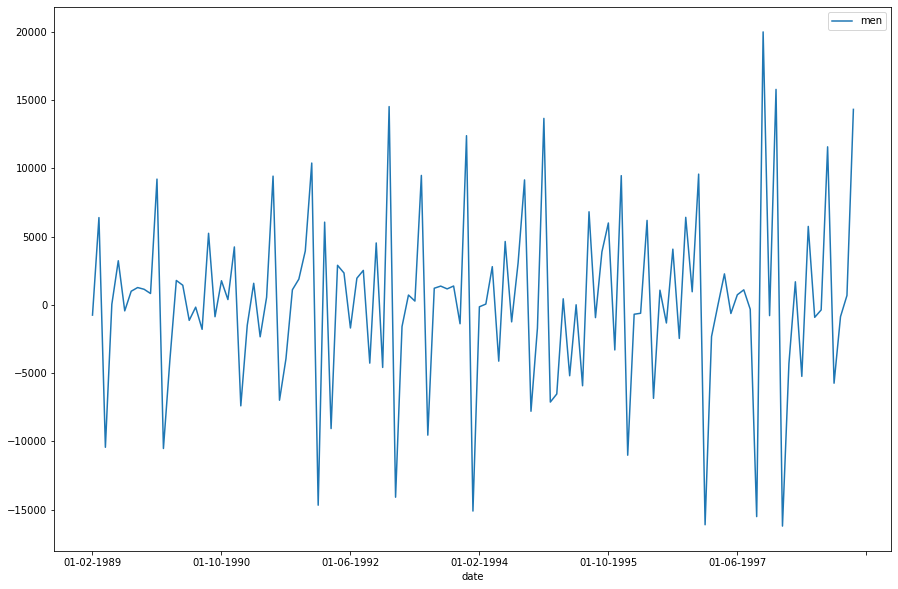

In [50]:
data_diff.plot(figsize=(15,10))

###### Auto Regressive Model (AR)

In [51]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

In [33]:
data_error = mean_squared_error(data_base.Men,data_base.Forecast_Men)

In [34]:
data_error

43555281.01318487

In [35]:
np.sqrt(data_error)

6599.642491316092

In [109]:
X=data_men.values

train = X[0:96] #96 train data
test = X[95:]   #24 test data
predictions = []

In [122]:
import warnings
warnings.filterwarnings('ignore')
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [73]:
predictions=model_ar_fit.predict(start=95,end=120)

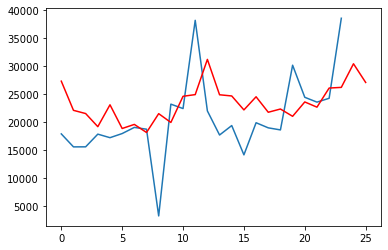

In [81]:
plt.plot(test)
plt.plot(predictions,color="red")

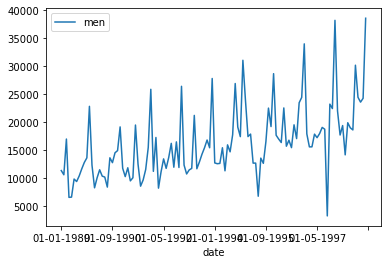

In [75]:
data_men.plot()

###### ARIMA model

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [133]:
#p, d, q
#p - periods taken for auto regressive model
#d - order of difference
#q - periods in moving average model
import warnings
warnings.filterwarnings('ignore')

model_arima = ARIMA(train,order=(0,2,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1878.0030036317312


In [134]:
predictions= model_arima_fit.forecast(steps=24)[0]
predictions

array([23881.99366817, 23133.32029415, 21384.63920547, 21654.88670681,
       21926.67703379, 22200.01018638, 22474.88616461, 22751.30496845,
       23029.26659793, 23308.77105302, 23589.81833374, 23872.40844009,
       24156.54137206, 24442.21712965, 24729.43571287, 25018.19712172,
       25308.50135619, 25600.34841628, 25893.738302  , 26188.67101334,
       26485.14655031, 26783.1649129 , 27082.72610112, 27383.83011496])

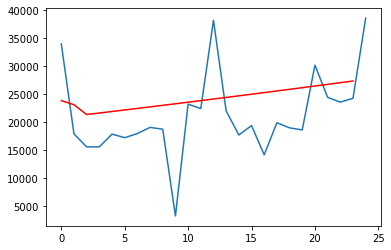

In [135]:
plt.plot(test)
plt.plot(predictions,color='red')

In [116]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [137]:
import warnings
warnings.filterwarnings('ignore')
for value in pdq:
    try:
        model_arima = ARIMA(train,order=value)
        model_arima_fit = model_arima.fit()
        print(value,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 1930.3113264852177
(0, 0, 1) 1921.9297553150877
(0, 0, 2) 1917.1109077598046
(0, 0, 3) 1917.3722810434294
(0, 0, 4) 1917.9596492532798
(0, 1, 0) 1923.0044975724718
(0, 1, 1) 1886.9955619925745
(0, 1, 2) 1886.2033422602187
(0, 1, 3) 1886.1113688190178
(0, 1, 4) 1888.1067370442336
(0, 2, 0) 2002.6557264038997
(0, 2, 1) 1910.1408582838003
(0, 2, 2) 1880.224205612269
(0, 2, 3) 1878.3618587215046
(0, 2, 4) 1878.0030036317312
(1, 0, 0) 1916.170665288896
(1, 0, 1) 1913.93791928214
(1, 0, 4) 2075.119700959921
(1, 1, 0) 1903.6455074370906
(1, 1, 1) 1885.506897979604
(1, 1, 2) 1887.163572200899
(1, 1, 3) 1888.108589811786
(1, 2, 0) 1947.105441030481
(1, 2, 1) 1891.600573029681
(1, 2, 3) 1882.5757826266472
(2, 0, 0) 1913.4540674039715
(2, 0, 1) 1915.3891172068709
(2, 0, 2) 1914.8405204352225
(2, 1, 0) 1902.8029653430417
(2, 1, 1) 1886.7044864762481
(2, 1, 2) 1886.1153461821966
(2, 1, 3) 1890.5564995247532
(2, 1, 4) 1889.6580079414384
(2, 2, 0) 1928.0941452681077
(2, 2, 1) 1890.990014136

###### minimum value 
(0,2,4) - 1878.0030036317312